In [1]:
import seaborn
import matplotlib.pyplot as plt

from wordcloud import WordCloud

from collections import Counter

try:
    import constants as c
except ImportError:
    c = None
    raise ImportError('constants' + ' not imported')

try:
    import visualisation_fn as v
except ImportError:
    c = None
    raise ImportError('visualisation_fn' + ' not imported')

In [2]:
N_MOST_COMMON = c.N_MOST_COMMON
PATH_TO_PICKLE = c.PATH_TO_PICKLE
MODEL_NAME = c.MODEL_NAME

# Exemple sur un paragraphe random

In [3]:
t_p = v.TextProcessing(PATH_TO_PICKLE)

on load la liste des sequences dans l'objet TextProcessing

In [4]:
t_p.load()

extraction done
extraction done
extraction done


In [5]:
t_p.prepare()

In [6]:
t_p.text[:15]

'la relativité g'

In [7]:
t_p.text_split[:15]

['la',
 'relativité',
 'générale',
 'est',
 'une',
 'théorie',
 'relativiste',
 'de',
 'la',
 'gravitation',
 'c',
 'est',
 'à',
 'dire',
 'qu']

# Fréquences

In [8]:
sorted_cardinalities = v.cardinality_of_words(t_p.text_split)

In [9]:
common_words = list(sorted_cardinalities.items())[:N_MOST_COMMON]

In [10]:
common_words[:15]

[('la', 14),
 ('de', 12),
 ('et', 6),
 ('relativité', 4),
 ('est', 4),
 ('l', 4),
 ('générale', 3),
 ('théorie', 3),
 ('à', 3),
 ('elle', 3),
 ('d', 3),
 ('le', 3),
 ('des', 3),
 ('qui', 3),
 ('gravitation', 2)]

In [11]:
words = [w[0] for w in common_words]
counts = [w[1] for w in common_words]

## Premier affichage

Text(0.5, 1.0, 'Most Common Words in this wikipedia samples')

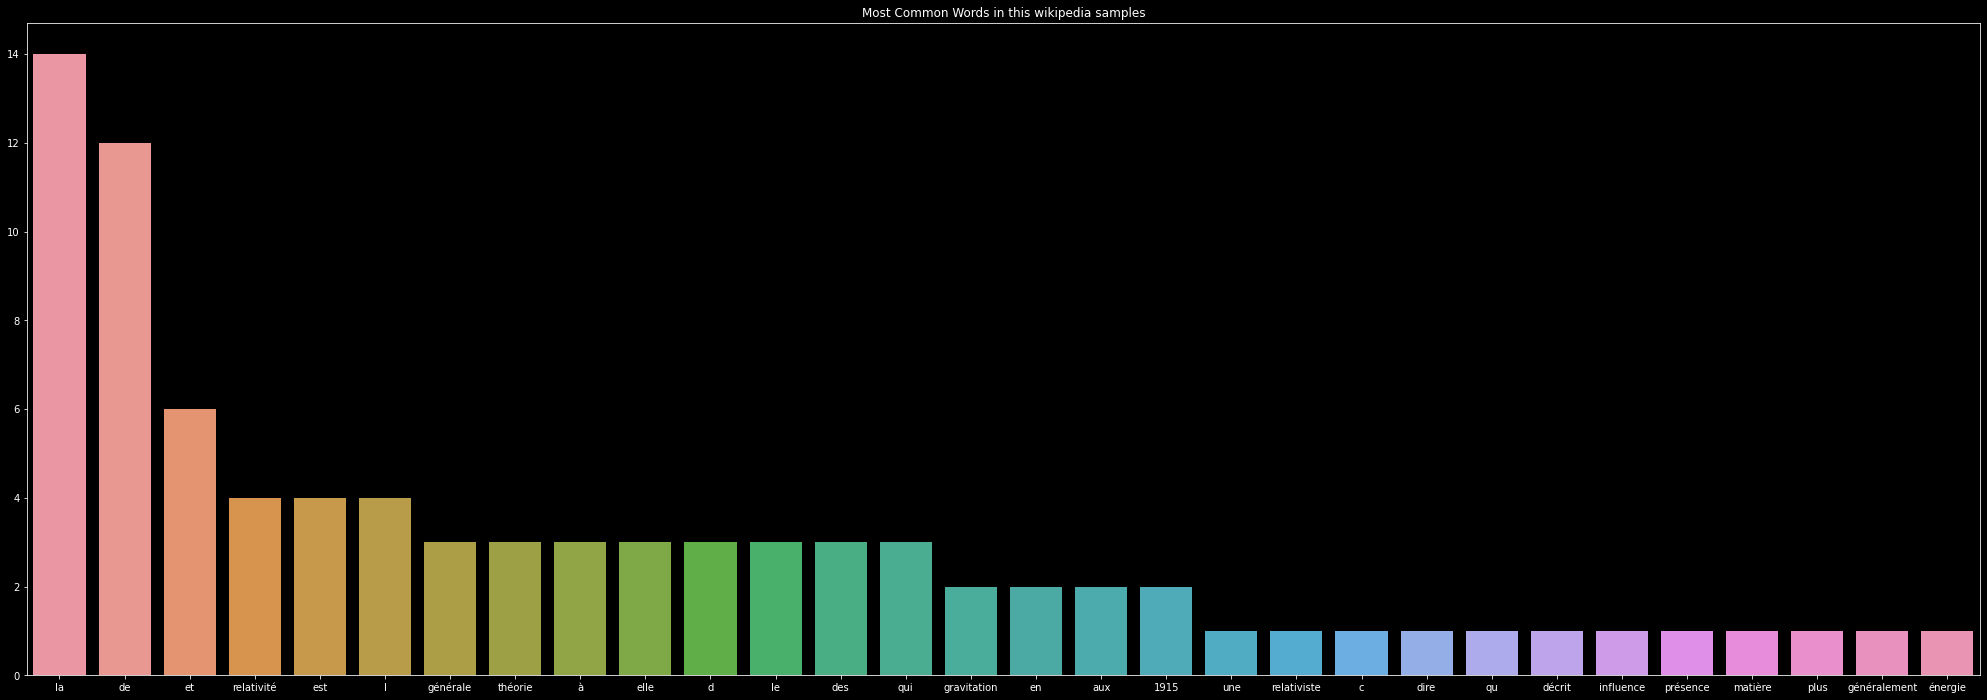

In [12]:
plt.style.use('dark_background')
plt.figure(figsize=(35, 12))

seaborn.barplot(x = words, y = counts)
plt.title('Most Common Words in this wikipedia samples')

On voit que 'la', est le mot le plus utilisé. Cela semble logique, mais ce n'est pas très instructif sur le contexte étudié...

Nous allons donc supprimer ces "stopwords"

## Suppression des stopwords avec nltk

In [13]:
text_without_stopwords = t_p.without_stopwords()

In [14]:
text_without_stopwords[:6]

['relativité', 'générale', 'théorie', 'relativiste', 'gravitation', 'dire']

pour plus d'efficacité on utilise la fonction Counter de Collection

In [15]:
cardinalities = Counter(text_without_stopwords)

In [16]:
words = [cardinality[0] for cardinality in cardinalities.most_common(N_MOST_COMMON)]
counts = [cardinality[1] for cardinality in cardinalities.most_common(N_MOST_COMMON)]

## Second affichage

Text(0.5, 1.0, 'Most Common Words in this wikipedia samples')

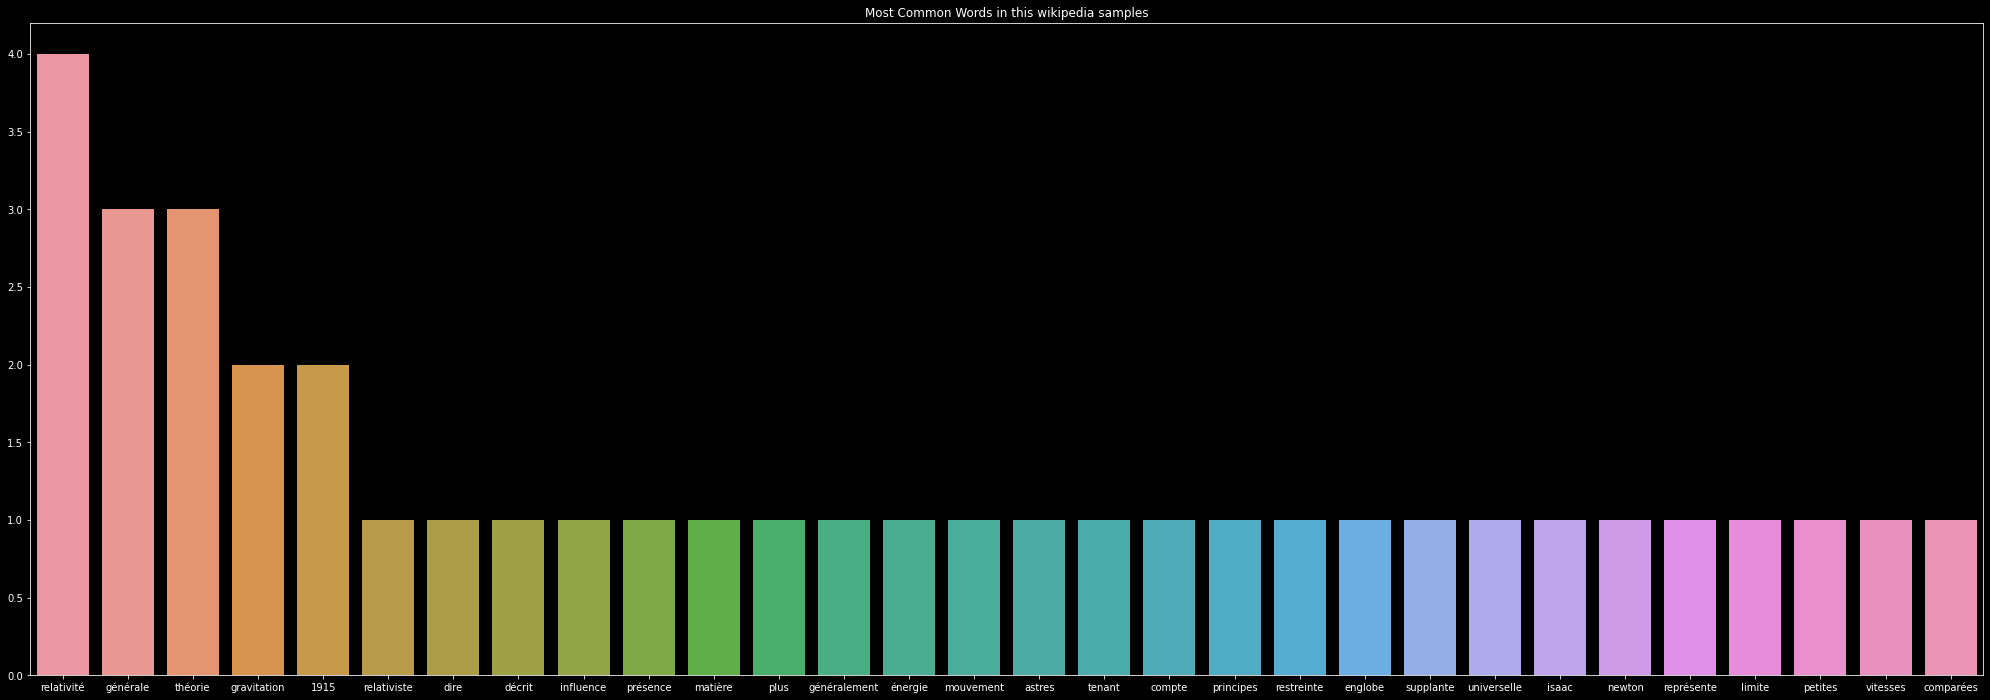

In [17]:
plt.style.use('dark_background')
plt.figure(figsize=(35, 12))

seaborn.barplot(x = words, y = counts)
plt.title('Most Common Words in this wikipedia samples')

On comprend directement ici les thèmes de l'article étudié

# Wordcloud

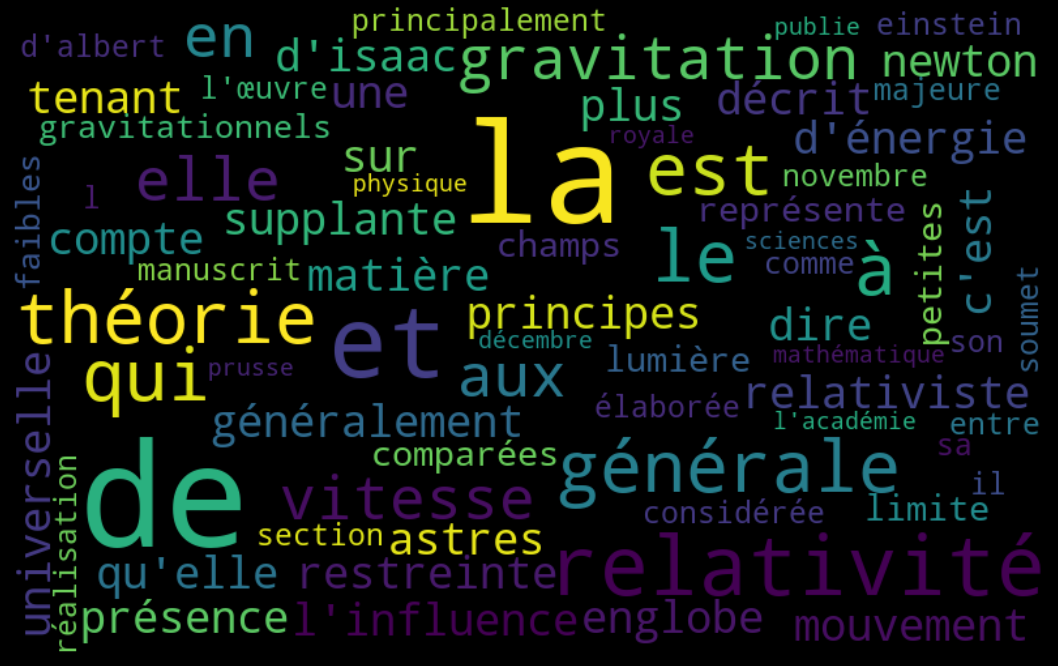

In [18]:
wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(t_p.text)
plt.figure(figsize=(19, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off'); #le point virgule enleve des coordonnées qui s'affichent

Ici encore, les stopwords nous empêche d'y voir clair

sans les stopwords ...

In [19]:
text_without_stopwords = t_p.without_stopwords_concatenated()

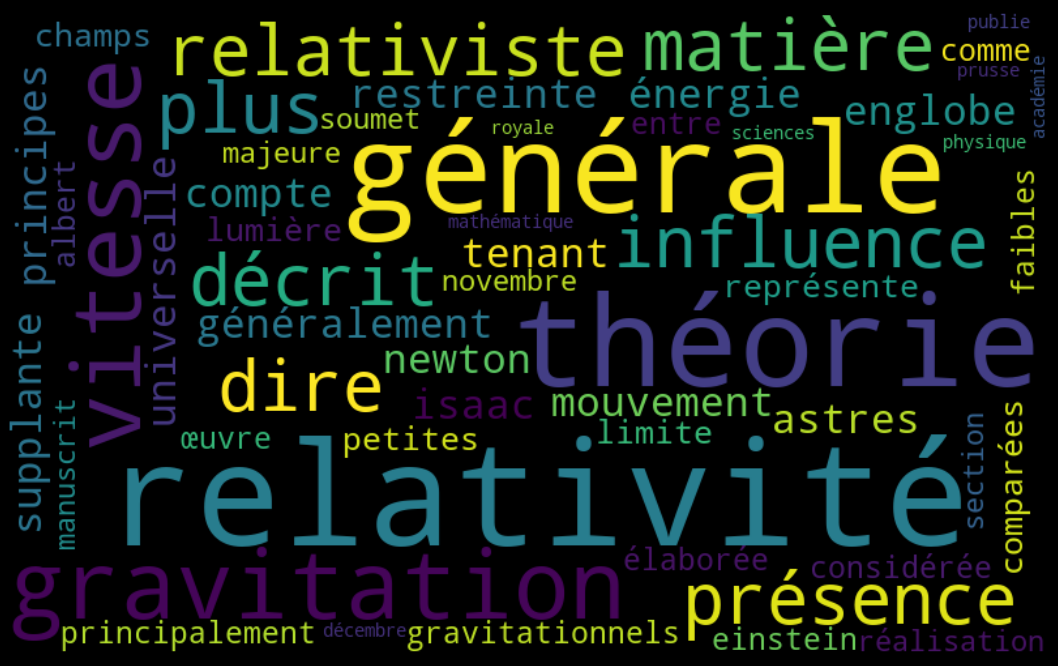

In [20]:
wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(t_p.text_without_stopwords)
plt.figure(figsize=(19, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off'); #le point virgule enleve des coordonnées qui s'affichent

On obtient une sorte de 'résumé' de l'article, dont on trouve directement les grands thèmes 

# Word2vec

In [33]:
e = v.Embedding(MODEL_NAME)

In [34]:
e.embedding(t_p.text)

In [35]:
words_embedding_dim_2 = e.pca()

In [36]:
words_embedding_dim_2.shape

(152, 2)

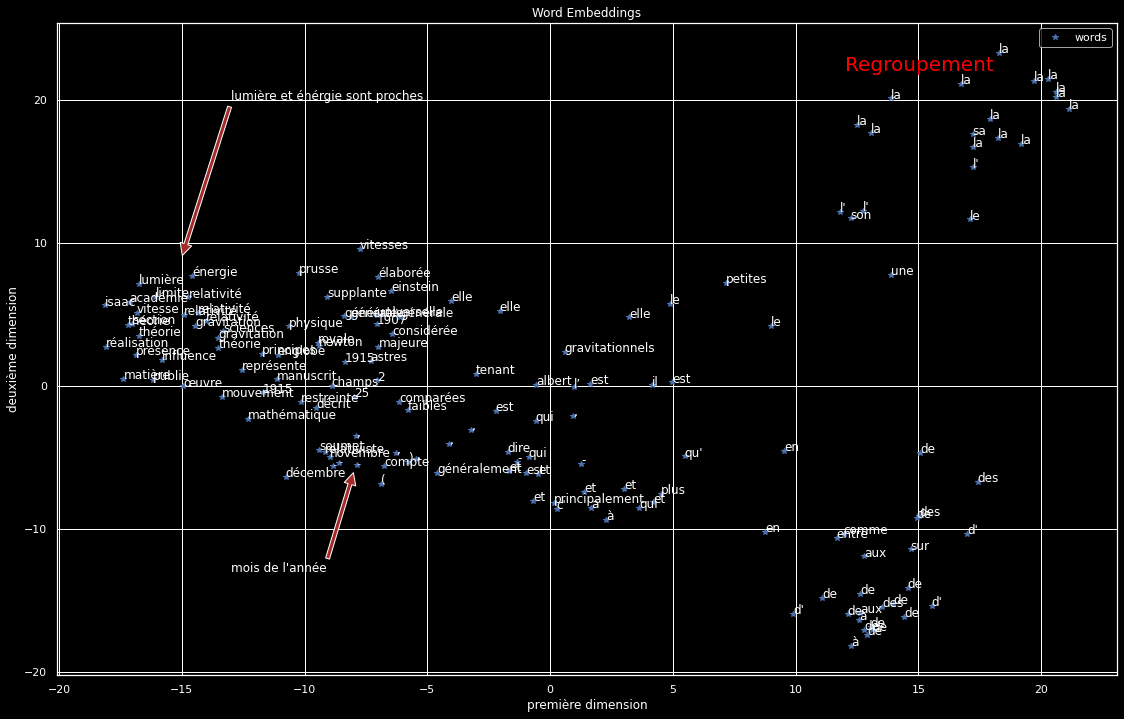

In [37]:
seaborn.set()
plt.style.use('dark_background')
plt.figure(figsize = (19, 12))

plt.plot(words_embedding_dim_2[:,0], words_embedding_dim_2[:,1], 'b', label = 'words', linewidth=0, marker = '*')

plt.title('Word Embeddings')
plt.xlabel('première dimension')
plt.ylabel('deuxième dimension')
plt.text(12, 22, 'Regroupement', c = 'red', animated = True, fontsize = 20)
plt.annotate('mois de l\'année', xy=(-8, -6), xytext=(-13, -13), 
arrowprops={'facecolor':'brown', 'shrink':0.01} )
plt.annotate('lumière et énérgie sont proches', xy=(-15, 9), xytext=(-13, 20), 
arrowprops={'facecolor':'brown', 'shrink':0.01} )
plt.legend()

plt.grid(True)

for i, w in enumerate(e.words):
    plt.annotate(w, xy=(words_embedding_dim_2[i, 0], words_embedding_dim_2[i, 1]))

plt.show()

Les mots sont bien regroupés selon leurs sens : 

les 'la' forment un cluster en haut à droite

les mois de l'année décembre et novembre sont proches

lumière et énérgie sont proches.